# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

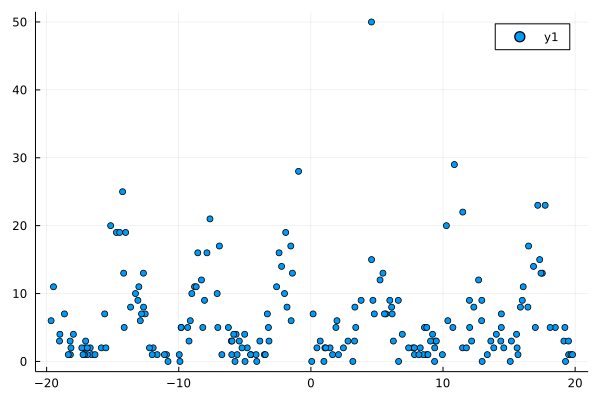

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -558.2422919067297
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.393456 seconds (7.09 M allocations: 458.082 MiB, 11.75% gc time, 97.36% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.32707247609181667, 0.19104390743086064, 0.4670792629153611, 0.5995312749047299, 0.5444844575760047, 0.3892068659963866, 0.38133800939363155, 0.28211758063925146, 0.3243827722455233, 0.5565950076016888  …  0.24032635969177968, 0.26341940067857883, 0.2542705179947061, 0.5392863161785547, 0.36820519761374226, 0.40768068377969285, 0.4788421821528581, 0.6142281389104167, 0.2458173717214463, 0.20214373136972016], θ = [3.964718578414681, 2.990908736007634, 3.437727321641068, 2.913257101006907, 9.760058123869353, 7.9005187014577345, 2.470138607572491, 5.9605190358934435, 3.4696291481340253, 13.649425726295217  …  6.966502017352385, 3.4799007705759113, 2.486617040457332, 8.788040001409074, 7.416398823636487, 3.4523163304685784, 2.943962083768301, 11.636434133578563, 4.974973638770232, 6.477956439141395]), opt_state = (NamedTuple(),), hyperopt_state = (Nam

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -761.604176254962
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.341575 seconds (4.69 M allocations: 334.137 MiB, 9.14% gc time, 95.82% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 14.03850163243417) infered by Analytic Variational Inference , (local_vars = (c = [0.5360404886309309, 0.33543722082381827, 0.6464662650619611, 0.8107443975999997, 0.5279331778041205, 0.2864816697460004, 0.6049851374815919, 0.40676264933383083, 0.5303442909776322, 0.5461538410061634  …  0.15632650067941192, 0.43353136007855503, 0.43081162109157217, 0.5243305408874653, 0.2717781837124534, 0.6073310794500381, 0.68165904417936, 0.6068223914234561, 0.42247660018016125, 0.1729753906127905], θ = [5.739098638397766, 4.474090094566489, 5.349741751879979, 5.037907383333198, 9.895896359447123, 8.531410058307568, 4.36930232588385, 7.47742488022721, 5.2329902953361405, 13.754683623642176  …  7.952166343898112, 5.091138284822968, 4.111460604695356, 8.927833493577026, 8.068240515197994, 5.30946231057312, 4.924967155422121, 11.640172497917561, 6.571672465014056, 7.606189883181128], γ = [8.751734853207664, 8.031925974365633, 9.06953973164535

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

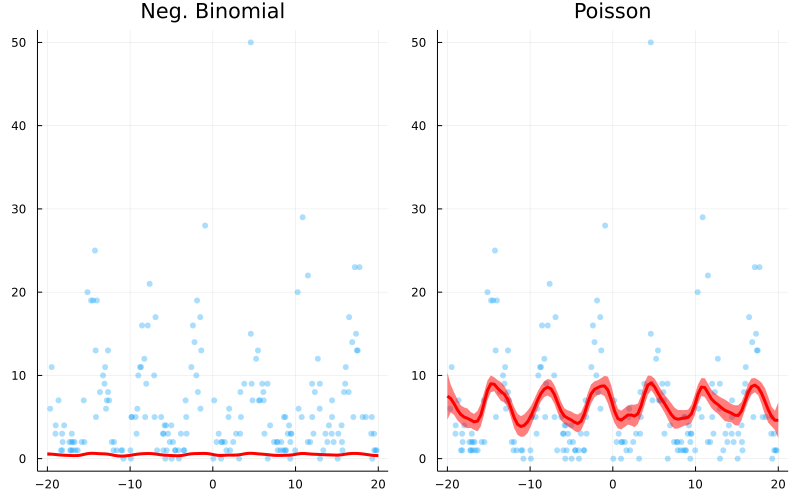

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*